In [1]:
import os
import openai
import tiktoken

In [2]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

open.api_key = os.environ['OPENAI_API_KEY']

In [22]:
def complete_gpt_sentences(prompt, model="gpt-3.5-turbo",
                               temperature=0.6, max_tokens=100, stop=["."]):
    
    system_message = """
    For each provided sentence, you will randomly complete it in a way that either forms a noun phrase (NP) or a sentential complement (S).
    - A Noun Phrase (NP) acts as the direct object of the main verb, elaborating on or specifying an entity or concept directly involved in the action.
    - A Sentential Complement (S) introduces a subordinate clause that provides additional context, reasons, or consequences related to the action described by the main verb. This might involve detailing outcomes, purposes, or explaining circumstances in a way that expands upon the main clause's content.

    Note: Generate completions that distinctly fit one of these structures.
    """
    
    user_prompt = f"Complete the following sentence: '{prompt}'."
    
    messages = [{'role': 'system', 'content': system_message},
                {'role': 'user', 'content': user_prompt}]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
        stop=stop
    )
    
    return response.choices[0].message.content

with open("no_cue_prompts.txt") as prompts_file:
    prompts = prompts_file.readlines()

    generated_sentences = []
    for prompt in prompts:
        generated_text = complete_gpt_sentences(prompt.strip())
        generated_sentences.append(prompt.strip() + generated_text)
        print(f"Prompt: {prompt.strip()}")
        print(f"Completion: {generated_text}\n")

Prompt: The employees understood the contract
Completion: NP: The employees understood the contract details thoroughly

Prompt: The mechanic accepted the car
Completion: The mechanic accepted the car **with a faulty transmission**

Prompt: The old man recalled the nurse
Completion: NP: The old man recalled the nurse from his childhood

Prompt: The traveller heard the clock
Completion: S: striking twelve times, signaling the midnight hour

Prompt: The worker maintained the walls
Completion: The worker maintained the walls to prevent further deterioration

Prompt: The apprentice forgot the bicycle
Completion: NP: The apprentice forgot the bicycle he borrowed yesterday

Prompt: The committee mentioned the issue
Completion: The committee mentioned the issue that had been causing significant delays

Prompt: The army found the supplies
Completion: S: that they had been searching for weeks

Prompt: The umpire warned the spectators
Completion: The umpire warned the spectators that their behavi

In [23]:
with open('gpt_sentences.txt', 'w') as f:
    for line in generated_sentences:
        f.write("%s\n" % line)

In [24]:
import spacy
from spacy import displacy
from pathlib import Path

In [25]:
nlp = spacy.load("en_core_web_sm")

In [26]:
with open('gpt_sentences.txt') as gpt_output:
    for line in gpt_output:
        sentence = line.strip()
        doc = nlp(sentence)
        displacy.render(doc, style="dep")

        for token in doc:
            print(f"{token.text}: {token.dep_} from {token.head.text}")
        
        
        has_sentential_complement = any(token.dep_ in ["ccomp", "xcomp"] for token in doc)
        print(f"Has Sentential Complement: {has_sentential_complement}")

The: det from employees
employees: nsubj from understood
understood: ROOT from understood
the: det from details
contract: compound from details
details: dobj from understood
thoroughly: advmod from understood
Has Sentential Complement: False


The: det from mechanic
mechanic: nsubj from accepted
accepted: ROOT from accepted
the: det from car
car: dobj from accepted
with: prep from accepted
a: det from transmission
faulty: amod from transmission
transmission: pobj from with
Has Sentential Complement: False


The: det from man
old: amod from man
man: nsubj from recalled
recalled: ROOT from recalled
the: det from nurse
nurse: dobj from recalled
from: prep from recalled
his: poss from childhood
childhood: pobj from from
Has Sentential Complement: False


The: det from traveller
traveller: nsubj from heard
heard: ROOT from heard
the: det from clock
clock: nsubj from striking
striking: ccomp from heard
twelve: nummod from times
times: dobj from striking
,: punct from heard
signaling: advcl from heard
the: det from hour
midnight: compound from hour
hour: dobj from signaling
Has Sentential Complement: True


The: det from worker
worker: nsubj from maintained
maintained: ROOT from maintained
the: det from walls
walls: dobj from maintained
to: aux from prevent
prevent: advcl from maintained
further: amod from deterioration
deterioration: dobj from prevent
Has Sentential Complement: False


The: det from apprentice
apprentice: nsubj from forgot
forgot: ROOT from forgot
the: det from bicycle
bicycle: dobj from forgot
he: nsubj from borrowed
borrowed: relcl from bicycle
yesterday: npadvmod from forgot
Has Sentential Complement: False


The: det from committee
committee: nsubj from mentioned
mentioned: ROOT from mentioned
the: det from issue
issue: dobj from mentioned
that: nsubj from causing
had: aux from causing
been: aux from causing
causing: relcl from issue
significant: amod from delays
delays: dobj from causing
Has Sentential Complement: False


The: det from army
army: nsubj from found
found: ROOT from found
the: det from supplies
supplies: dobj from found
that: pobj from for
they: nsubj from searching
had: aux from searching
been: aux from searching
searching: relcl from supplies
for: prep from searching
weeks: pobj from for
Has Sentential Complement: False


The: det from umpire
umpire: nsubj from warned
warned: ROOT from warned
the: det from spectators
spectators: dobj from warned
that: mark from was
their: poss from behavior
behavior: nsubj from was
was: ccomp from warned
unacceptable: acomp from was
Has Sentential Complement: True


The: det from artist
artist: nsubj from captured
captured: ROOT from captured
the: det from essence
essence: dobj from captured
of: prep from essence
the: det from moment
moment: pobj from of
with: prep from essence
vivid: amod from colors
colors: pobj from with
and: cc from colors
dynamic: amod from strokes
brush: compound from strokes
strokes: conj from colors
Has Sentential Complement: False


The: det from teacher
teacher: nsubj from explained
explained: ROOT from explained
the: det from concept
concept: dobj from explained
that: nsubj from confused
had: aux from confused
confused: relcl from concept
the: det from students
students: dobj from confused
for: prep from confused
weeks: pobj from for
Has Sentential Complement: False


The: det from gardener
gardener: nsubj from observed
observed: ROOT from observed
the: det from plants
plants: dobj from observed
to: aux from determine
determine: advcl from observed
which: det from ones
ones: nsubj from needed
needed: ccomp from determine
more: amod from water
water: dobj from needed
Has Sentential Complement: True


The: det from chef
chef: nsubj from tasted
tasted: ROOT from tasted
the: det from sauce
sauce: dobj from tasted
with: prep from tasted
a: det from hint
hint: pobj from with
of: prep from hint
garlic: pobj from of
and: cc from garlic
basil: conj from garlic
Has Sentential Complement: False


The: det from detective
detective: nsubj from uncovered
uncovered: ROOT from uncovered
the: det from clue
clue: dobj from uncovered
that: nsubj from led
led: relcl from clue
to: prep from led
the: det from suspect
suspect: poss from arrest
's: case from suspect
arrest: pobj from to
Has Sentential Complement: False


The: det from author
author: nsubj from finished
finished: ROOT from finished
the: det from chapter
chapter: dobj from finished
is: ccomp from finished
the: det from step
final: amod from step
step: attr from is
before: prep from step
sending: pcomp from before
it: dobj from sending
to: prep from sending
the: det from editor
editor: pobj from to
Has Sentential Complement: True


The: det from programmer
programmer: nsubj from debugged
debugged: ROOT from debugged
the: det from software
software: dobj from debugged
to: aux from ensure
ensure: advcl from debugged
it: nsubj from ran
ran: ccomp from ensure
smoothly: advmod from ran
Has Sentential Complement: True


The: det from historian
historian: nsubj from researched
researched: ROOT from researched
the: det from era
era: dobj from researched
in: prep from researched
order: pobj from in
to: aux from understand
understand: acl from order
the: det from dynamics
socio: nmod from dynamics
-: amod from dynamics
political: amod from dynamics
dynamics: dobj from understand
of: prep from dynamics
the: det from time
time: pobj from of
Has Sentential Complement: False


The: det from musician
musician: nsubj from composed
composed: ROOT from composed
the: det from melody
melody: dobj from composed
that: nsubjpass from performed
would: aux from performed
be: auxpass from performed
performed: relcl from melody
at: prep from performed
the: det from concert
upcoming: amod from concert
concert: pobj from at
Has Sentential Complement: False


The: det from runner
runner: nsubj from broke
broke: ROOT from broke
the: det from record
record: dobj from broke
set: acl from record
in: prep from broke
1998: pobj from in
Has Sentential Complement: False


The: det from director
director: nsubj from filmed
filmed: ROOT from filmed
the: det from scene
scene: dobj from filmed
with: prep from filmed
intense: amod from emotion
emotion: pobj from with
and: cc from emotion
precision: conj from emotion
Has Sentential Complement: False


The: det from student
student: nsubj from studied
studied: ROOT from studied
the: det from material
material: dobj from studied
because: mark from wanted
she: nsubj from wanted
wanted: advcl from studied
to: aux from ace
ace: xcomp from wanted
the: det from exam
upcoming: amod from exam
exam: dobj from ace
Has Sentential Complement: True


The: det from doctor
doctor: nsubj from reviewed
reviewed: ROOT from reviewed
the: det from file
case: compound from file
file: dobj from reviewed
Has Sentential Complement: False


The: det from builder
builder: nsubj from measured
measured: ROOT from measured
the: det from space
space: dobj from measured
to: aux from ensure
ensure: advcl from measured
it: nsubj from was
was: ccomp from ensure
suitable: acomp from was
for: prep from was
the: det from cabinets
new: amod from cabinets
kitchen: compound from cabinets
cabinets: pobj from for
Has Sentential Complement: True


The: det from driver
driver: nsubj from followed
followed: ROOT from followed
the: det from route
route: dobj from followed
to: aux from avoid
avoid: relcl from route
heavy: amod from traffic
traffic: dobj from avoid
Has Sentential Complement: False


The: det from teacher
teacher: nsubj from praised
praised: ROOT from praised
the: det from effort
effort: dobj from praised
,: punct from effort
which: nsubj from impressed
had: aux from impressed
greatly: advmod from impressed
impressed: relcl from effort
the: det from class
entire: amod from class
class: dobj from impressed
Has Sentential Complement: False


The: det from critic
critic: nsubj from reviewed
reviewed: ROOT from reviewed
the: det from performance
performance: dobj from reviewed
to: aux from determine
determine: advcl from reviewed
if: mark from lived
it: nsubj from lived
lived: ccomp from determine
up: prt from lived
to: prep from lived
the: det from expectations
high: amod from expectations
expectations: pobj from to
Has Sentential Complement: True


The: det from traveler
traveler: nsubj from visited
visited: ROOT from visited
the: det from landmark
landmark: dobj from visited
in: prep from visited
Paris: pobj from in
Has Sentential Complement: False


The: det from woman
woman: nsubj from noticed
noticed: ROOT from noticed
the: det from flyer
flyer: dobj from noticed
Has Sentential Complement: False


The: det from pilot
pilot: nsubj from navigated
navigated: ROOT from navigated
the: det from storm
storm: dobj from navigated
to: aux from ensure
ensure: advcl from navigated
the: det from safety
safety: dobj from ensure
of: prep from safety
the: det from passengers
passengers: pobj from of
and: cc from passengers
crew: conj from passengers
Has Sentential Complement: False


The: det from journalist
journalist: nsubj from wrote
wrote: ROOT from wrote
the: det from article
article: dobj from wrote
that: nsubj from highlighted
highlighted: relcl from article
the: det from corruption
corruption: dobj from highlighted
within: prep from corruption
the: det from government
government: pobj from within
Has Sentential Complement: False


The: det from professor
professor: nsubj from questioned
questioned: ROOT from questioned
the: det from theory
theory: dobj from questioned
to: aux from understand
understand: xcomp from questioned
its: poss from implications
implications: dobj from understand
Has Sentential Complement: True


The: det from banker
banker: nsubj from secured
secured: ROOT from secured
the: det from application
loan: compound from application
application: dobj from secured
Has Sentential Complement: False


The: det from actor
actor: nsubj from rehearsed
rehearsed: ROOT from rehearsed
the: det from lines
lines: dobj from rehearsed
to: aux from ensure
ensure: advcl from rehearsed
he: nsubj from delivered
delivered: ccomp from ensure
a: det from performance
flawless: amod from performance
performance: dobj from delivered
Has Sentential Complement: True


The: det from politician
politician: nsubj from debated
debated: ROOT from debated
the: det from policy
policy: dobj from debated
that: nsubj from impact
could: aux from impact
potentially: advmod from impact
impact: relcl from policy
the: det from election
upcoming: amod from election
election: dobj from impact
Has Sentential Complement: False


The: det from surgeon
surgeon: nsubj from performed
performed: ROOT from performed
the: det from procedure
procedure: dobj from performed
successfully: advmod from performed
Has Sentential Complement: False


The: det from architect
architect: nsubj from designed
designed: ROOT from designed
the: det from building
building: dobj from designed
in: prep from designed
a: det from way
way: pobj from in
that: nsubj from maximizes
maximizes: relcl from way
natural: amod from light
light: nmod from efficiency
and: cc from light
energy: conj from light
efficiency: dobj from maximizes
Has Sentential Complement: False


The: det from dancer
dancer: nsubj from practiced
practiced: ROOT from practiced
the: det from routine
routine: dobj from practiced
to: prep from practiced
perfection: pobj from to
before: prep from practiced
the: det from performance
big: amod from performance
performance: pobj from before
Has Sentential Complement: False


The: det from photographer
photographer: nsubj from captured
captured: ROOT from captured
the: det from moment
moment: dobj from captured
of: prep from moment
pure: amod from joy
joy: pobj from of
Has Sentential Complement: False


The: det from librarian
librarian: nsubj from organized
organized: ROOT from organized
the: det from collection
collection: dobj from organized
of: prep from collection
rare: amod from books
books: pobj from of
Has Sentential Complement: False


The: det from entrepreneur
entrepreneur: nsubj from pitched
pitched: ROOT from pitched
the: det from idea
idea: dobj from pitched
to: prep from pitched
the: det from investors
investors: pobj from to
Has Sentential Complement: False


The: det from baker
baker: nsubj from perfected
perfected: ROOT from perfected
the: det from recipe
recipe: dobj from perfected
because: mark from wanted
she: nsubj from wanted
wanted: advcl from perfected
to: aux from impress
impress: xcomp from wanted
the: det from judges
judges: dobj from impress
at: prep from impress
the: det from competition
baking: amod from competition
competition: pobj from at
Has Sentential Complement: True


The: det from scientist
scientist: nsubj from proposed
proposed: ROOT from proposed
the: det from hypothesis
hypothesis: dobj from proposed
that: dobj from revolves
the: det from Earth
Earth: nsubj from revolves
revolves: relcl from hypothesis
around: prep from revolves
the: det from sun
sun: pobj from around
Has Sentential Complement: False


The: det from counselor
counselor: nsubj from advised
advised: ROOT from advised
the: det from student
student: dobj from advised
to: aux from explore
explore: xcomp from advised
different: amod from paths
career: compound from paths
paths: dobj from explore
and: cc from explore
consider: conj from explore
their: poss from interests
interests: dobj from consider
and: cc from interests
strengths: conj from interests
before: prep from consider
making: pcomp from before
a: det from decision
decision: dobj from making
Has Sentential Complement: True


The: det from driver
driver: nsubj from inspected
inspected: ROOT from inspected
the: det from vehicle
vehicle: dobj from inspected
to: aux from ensure
ensure: advcl from inspected
it: nsubj from was
was: ccomp from ensure
roadworthy: acomp from was
Has Sentential Complement: True


The: det from coach
coach: nsubj from developed
developed: ROOT from developed
the: det from strategy
strategy: dobj from developed
that: nsubj from help
would: aux from help
help: relcl from strategy
the: det from team
team: nsubj from win
win: ccomp from help
the: det from championship
championship: dobj from win
Has Sentential Complement: True


The: det from inspector
inspector: nsubj from examined
examined: ROOT from examined
the: det from property
property: dobj from examined
to: aux from determine
determine: advcl from examined
if: mark from were
there: expl from were
were: ccomp from determine
any: det from violations
code: compound from violations
violations: attr from were
Has Sentential Complement: True


The: det from tourists
tourists: nsubj from saw
saw: ROOT from saw
the: det from palace
palace: dobj from saw
at: prep from saw
night: pobj from at
Has Sentential Complement: False


The: det from priest
priest: nsubj from recognized
recognized: ROOT from recognized
the: det from guests
guests: dobj from recognized
who: nsubj from attended
had: aux from attended
attended: relcl from guests
his: poss from sermon
previous: amod from sermon
sermon: dobj from attended
Has Sentential Complement: False


The: det from owners
owners: nsubj from insured
insured: ROOT from insured
the: det from house
house: dobj from insured
so: mark from protect
that: mark from protect
they: nsubj from protect
could: aux from protect
protect: advcl from insured
their: poss from investment
investment: dobj from protect
Has Sentential Complement: False


The: det from lawyer
lawyer: nsubj from established
established: ROOT from established
the: det from alibi
alibi: dobj from established
that: nsubj from prove
would: aux from prove
prove: relcl from alibi
the: det from defendant
defendant: poss from innocence
's: case from defendant
innocence: dobj from prove
Has Sentential Complement: False


In [27]:
def categorize_sentences(messages,
                model="gpt-3.5-turbo",
                temperature=0,
                max_tokens=3000):
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content

In [28]:
with open ("gpt_sentences.txt") as sentences: 
    sentences = ',\n'.join([
        f'{{"sentence": "{sentence}", "is_NP": true/false, "is_S": true/false}}'
        for sentence in sentences
    ])

system_message = """
Classify each sentence based on its grammatical structure by determining whether each sentence is a noun phrase (is_NP), 
or a sentential complement (is_S). 
A noun phrase acts as the direct object of the main verb, while a sentential complement acts as the embedded subject in an upcoming 
subordinate clause, introduced by conjunctions like "that" and often related to thoughts, speech, perception, or feelings. 
For example, in "She said that she was happy," "that she was happy" is a sentential complement.

Please provide your classification for each sentence in the JSON format, marking 'true' for the category that applies and 
'false' for those that do not. Each sentence should be classified into only one category.
Format for classification:

{
    "sentences": [
        """ + sentences + """
    ]
}
"""

messages = [
    {'role': 'system', 'content': system_message}
]

response = categorize_sentences(messages)
with open("gpt_output.json", "w") as file:
    file.write(response)

In [29]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import re
import json

In [30]:
with open("gpt_output.json") as gpt_sentences:    
    data = json.load(gpt_sentences)
    
    with open('np_gpt.txt', 'w') as f: 
        for sentence in data['sentences']:
            is_NP = sentence['is_NP']
            if is_NP:
                sentences = sentence['sentence'] 
                f.write("%s\n" % sentences)
                
    with open('s_gpt.txt', 'w') as f: 
        for sentence in data['sentences']:
            is_S = sentence['is_S']
            if is_S:
                sentences = sentence['sentence'] 
                f.write("%s\n" % sentences)

In [31]:
with open ("np_gpt.txt") as np_sentences, open ("s_gpt.txt") as s_sentences:
    gpt_np_sentences = np_sentences.read().lower()
    gpt_s_sentences = s_sentences.read().lower()
    
    gpt_np_tokens = nltk.word_tokenize(gpt_np_sentences)
    fdist_np_gpt = FreqDist(gpt_np_tokens)
    re_pattern = r'\w+'
    gpt_np_clean = []
    
    gpt_s_tokens = nltk.word_tokenize(gpt_s_sentences)
    fdist_s_gpt = FreqDist(gpt_s_tokens)
    re_pattern = r'\w+'
    gpt_s_clean = []
    
    for word in gpt_np_tokens:
        if re.match(re_pattern, word):
            gpt_np_clean.append(word)
            
    for word in gpt_s_tokens:
        if re.match(re_pattern, word):
            gpt_s_clean.append(word)

In [32]:
print(len(gpt_s_clean))

158


In [33]:
print(len(gpt_np_clean))

390


In [34]:
fdist_s_gpt.most_common(10)

[('the', 39),
 ('that', 10),
 ('had', 4),
 ('to', 3),
 ('would', 3),
 ('upcoming', 3),
 ('been', 2),
 ('for', 2),
 ('weeks', 2),
 ('teacher', 2)]

In [35]:
fdist_np_gpt.most_common(10)

[('the', 88),
 ('to', 17),
 ('and', 7),
 ('of', 6),
 ('a', 5),
 ('it', 5),
 ('ensure', 5),
 ('with', 4),
 ('in', 4),
 ('determine', 3)]

In [14]:
open.api_key = os.environ['ANTHROPIC_API_KEY']
import anthropic

In [25]:
import time

def complete_sentences_claude(prompt):
    message = anthropic.Anthropic().messages.create(
        model="claude-3-haiku-20240307",
        temperature=0.6,
        max_tokens=100,
        stop_sequences=["."],
        messages=[
            {"role": "user", 
             "content": f"Here is a prompt: '{prompt}'. Choose to complete it with one full sentence that is either a noun phrase or a sentential complement, not both."
            }
             ]
    )
    return message.content[0].text

with open("no_cue_prompts.txt") as prompts_file:
    prompts = prompts_file.readlines()   
    sentences_claude = []
    
    for prompt in prompts:
        complete_sentence = complete_sentences_claude(prompt.strip())
        sentences_claude.append(complete_sentence)
        print(complete_sentence)
        time.sleep(15)

The employees understood the contract's details
The mechanic accepted the car because it needed extensive repairs
The old man recalled the nurse's gentle touch
The traveller heard the clock strike midnight
The worker maintained the walls efficiently
The apprentice forgot the bicycle's repair
The committee mentioned the issue that had been a source of concern for some time
The army found the supplies in the abandoned warehouse
The umpire warned the spectators that the game would be forfeited if the disruptive behavior continued
The artist captured the essence of the serene landscape
The teacher explained the concept that the students found confusing
The gardener observed the plants thriving in the warm sunlight
The chef tasted the sauce, which was perfectly seasoned
The detective uncovered the clue that led to the culprit's arrest
The author finished the chapter, which was a satisfying conclusion to the narrative
The programmer debugged the software, which was a complex task
The histori

In [26]:
with open('claude_sentences.txt', 'w') as f:
    for line in sentences_claude:
        f.write("%s\n" % line)

In [27]:
def categorize_claude_sentences():
    message = anthropic.Anthropic().messages.create(
        model="claude-3-haiku-20240307",
        temperature=0,
        max_tokens=3000,
        stop_sequences=["."],
        messages=[
            {"role": "user", 
             "content": system_message}
        ]
    )
    return message.content[0].text

with open ("claude_sentences.txt") as sentences: 
    sentences = ',\n'.join([
        f'{{"sentence": "{sentence}", "is_NP": true/false, "is_S": true/false}}'
        for sentence in sentences
    ])

system_message = """
You will be provided with a list of sentences.
For each sentence, classify whether it is a noun phrase (is_NP) or a sentential complement (is_S).
NP acts as the direct object of the main verb, while S acts as the embedded subject in an upcoming subordinate clause.
Provide the output in JSON format with the following structure:

{
    "sentences": [
        """ + sentences + """
    ]
}
"""

response = categorize_claude_sentences()
with open("claude_output.json", "w") as file:
    file.write(response)

In [42]:
with open("claude_output.json") as claude_sentences:    
    data = json.load(claude_sentences)
    
    with open('np_claude.txt', 'w') as f: 
        for sentence in data['sentences']:
            is_NP = sentence['is_NP']
            if is_NP:
                sentences = sentence['sentence'] 
                f.write("%s\n" % sentences)
                
    with open('s_claude.txt', 'w') as f: 
        for sentence in data['sentences']:
            is_S = sentence['is_S']
            if is_S:
                sentences = sentence['sentence'] 
                f.write("%s\n" % sentences)

In [43]:
with open ("np_claude.txt") as np_sentences, open ("s_claude.txt") as s_sentences:
    claude_np_sentences = np_sentences.read().lower()
    claude_s_sentences = s_sentences.read().lower()
    
    claude_np_tokens = nltk.word_tokenize(claude_np_sentences)
    fdist_np_claude = FreqDist(claude_np_tokens)
    re_pattern = r'\w+'
    claude_np_clean = []
    
    claude_s_tokens = nltk.word_tokenize(claude_s_sentences)
    fdist_s_claude = FreqDist(claude_s_tokens)
    re_pattern = r'\w+'
    claude_s_clean = []
    
    for word in claude_np_tokens:
        if re.match(re_pattern, word):
            claude_np_clean.append(word)
            
    for word in claude_s_tokens:
        if re.match(re_pattern, word):
            claude_s_clean.append(word)

In [44]:
print(len(claude_s_clean))

258


In [45]:
print(len(claude_np_clean))

218


In [46]:
fdist_np_claude.most_common(10)

[('the', 63),
 ("'s", 7),
 ('of', 3),
 (',', 3),
 ('which', 3),
 ('was', 3),
 ('student', 3),
 ('efficiently', 2),
 ('in', 2),
 ('captured', 2)]

In [47]:
fdist_s_claude.most_common(10)

[('the', 60),
 ('that', 14),
 ('was', 10),
 ('a', 7),
 (',', 6),
 ('which', 6),
 ('would', 4),
 ('of', 3),
 ('to', 3),
 ('because', 2)]

In [48]:
gpt_count_np = 0
gpt_count_s = 0

with open("np_gpt.txt") as gpt_np, open("s_gpt.txt") as gpt_s:
    for line in gpt_np:
        gpt_count_np += 1
    for line in gpt_s:
        gpt_count_s += 1

claude_count_np = 0
claude_count_s = 0

with open("np_claude.txt") as claude_np, open("s_claude.txt") as claude_s:
    for line in claude_np:
        claude_count_np += 1 
    for line in claude_s:
        claude_count_s += 1

In [49]:
from matplotlib import pyplot as plt
import numpy as np

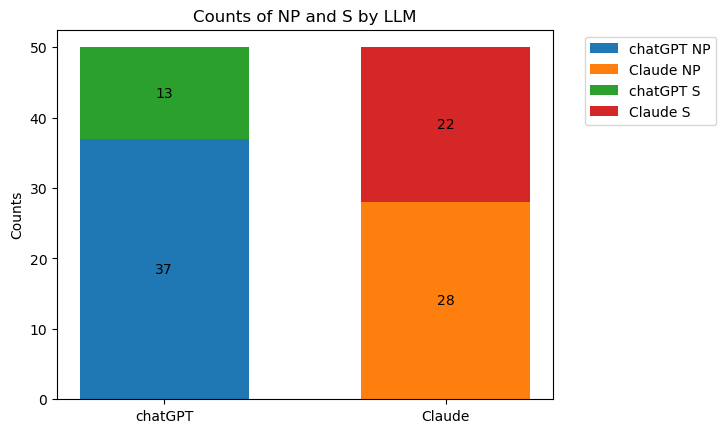

In [50]:
count_np = {
    'chatGPT': gpt_count_np,  
    'Claude': claude_count_np 
}
count_s = {
    'chatGPT': gpt_count_s,  
    'Claude': claude_count_s
}

LLMs = ['chatGPT', 'Claude']

width = 0.6
fig, ax = plt.subplots()

x = np.arange(len(LLMs))

bottom_np = np.zeros(len(LLMs))
bottom_s = np.zeros(len(LLMs))

for i, (LLM, count) in enumerate(count_np.items()):
    bars = ax.bar(x[i], count, width, label='{} NP'.format(LLM))
    bottom_np[i] += count
    ax.bar_label(bars, label_type='center')

for i, (LLM, count) in enumerate(count_s.items()):
    bars = ax.bar(x[i], count, width, label='{} S'.format(LLM), bottom=bottom_np[i])
    bottom_s[i] += count
    ax.bar_label(bars, label_type='center')

ax.set_ylabel('Counts')
ax.set_title('Counts of NP and S by LLM')
ax.set_xticks(x)
ax.set_xticklabels(LLMs)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()